# Analyse des Données   

In [2]:
# importations des packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
    


In [10]:
# Importation des données 
df = pd.read_csv ("Time-Wasters on Social Media.csv", index_col= "UserID" )
df.head(10)

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
UserID,,,,,,,,,,,,,,,,,,,,,
1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,89,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
7,56,Male,India,46201,False,False,Students,Rural,TikTok,247,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,191,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,34,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data


In [5]:
# Affichage des informations sur les variables :
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [11]:
# information sur les valeurs manquantes :
df.isna().sum() #aucune valeurs manquantes !

Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [17]:
df["Age"].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63], dtype=int64)

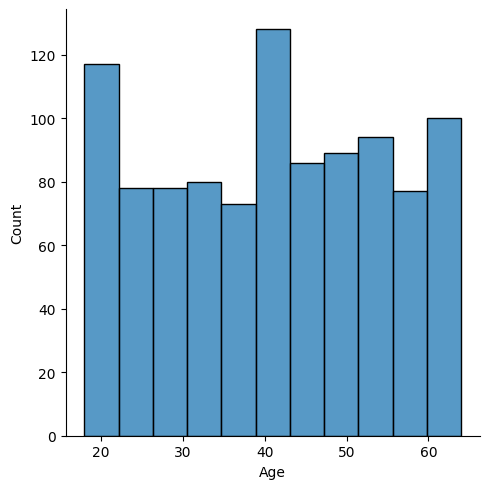

In [19]:

sns.displot(df["Age"])

<Axes: ylabel='Age'>

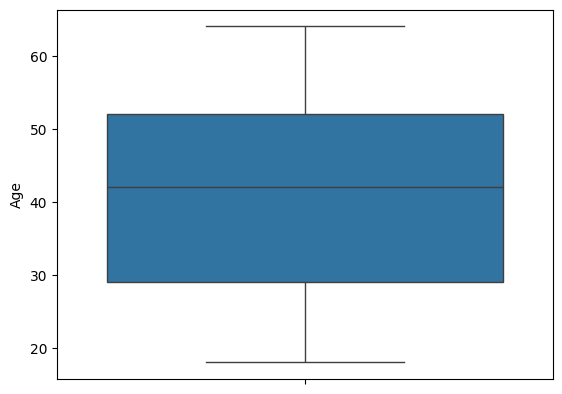

In [21]:
sns.boxplot(df["Age"])

<Axes: ylabel='Gender'>

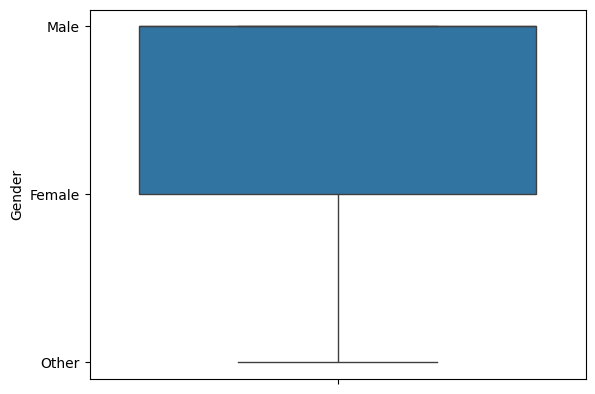

In [22]:
sns.boxplot (df["Gender"])

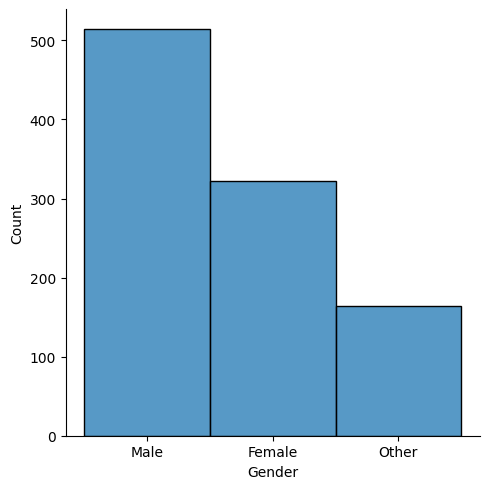

In [23]:
sns.displot(df["Gender"])

In [24]:
df["Location"].unique()


array(['Pakistan', 'Mexico', 'United States', 'Barzil', 'Vietnam',
       'India', 'Indonesia', 'Philippines', 'Japan', 'Germany'],
      dtype=object)